<a href="https://colab.research.google.com/github/Nurochman79/DataScience/blob/main/Prediction_of_customer_churn_by_decision_tree_algorithm_(with_outlier_handling)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**OBJECTIVE:** Prediction of customer churn use the decision tree algorithm without outlier handling,  and we only use the lable encoding for scaling the category data. We will compare the accuration with using outlier handling 

**1.Install library python**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**2.Load dataset Telco Customer Churn**

In [ ]:
df=pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn (1).csv')
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1531,7107-UBYKY,Female,0,Yes,Yes,35,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,25.75,882.55,No
6995,7164-BPTUT,Male,0,No,Yes,57,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Mailed check,89.55,5012.35,No
5429,9488-FVZCC,Female,0,Yes,Yes,72,Yes,Yes,DSL,Yes,...,Yes,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),79.50,5661.7,No
5811,6754-LZUKA,Male,0,Yes,No,61,Yes,Yes,DSL,No,...,Yes,No,Yes,Yes,Two year,No,Bank transfer (automatic),80.90,4932.5,No
554,5301-GAUUY,Male,0,No,No,32,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),80.35,2596.15,Yes
783,4678-DVQEO,Female,0,No,No,1,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Electronic check,52.20,52.2,Yes
1573,5014-WUQMG,Male,0,Yes,Yes,47,Yes,No,Fiber optic,Yes,...,Yes,No,No,Yes,One year,Yes,Electronic check,96.10,4391.45,No
1166,7129-ACFOG,Female,0,No,No,5,Yes,Yes,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,53.80,283.95,No
6387,9853-JFZDU,Female,0,Yes,No,35,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,56.85,1861.1,No
3933,5396-IZEPB,Male,0,No,No,9,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),19.70,180.7,No


**3. Data preprocessing**

In [ ]:
missing_value_format = ['N.A', 'na', 'n.a.', 'n/a', '?', '-']  # Formating data missing values

In [ ]:
df.shape    # Checking dataset property

(7043, 21)

In [ ]:
df.info() # Checking missing value. We find no missing value in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.drop('customerID', axis=1,inplace=True)  # Drop noise data

In [ ]:
df['TotalCharges'].value_counts() # We find 11 blank fields

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [ ]:
df=df.drop(df[df.TotalCharges == ' '].index, axis=0) # We drop blank fields in 'Totalcharges' column

In [ ]:
df['TotalCharges'] = df['TotalCharges'].astype('float64')  # We change the datatype to be float64

In [ ]:
df.reset_index(inplace=True)

In [ ]:
df.drop('index', axis=1, inplace=True)

In [ ]:
df.shape    # Number of rows is changing from 7043 to be 7032

(7032, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [ ]:
df_features=df.drop('Churn', axis=1)  # Split dataset into features  and target 
df_target=df['Churn']

In [ ]:
df_features.info()  # There is no "Churn" column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [ ]:
df_target.head()  # There is only "Churn" column

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

In [ ]:
# We change object datatype to category datatype
cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 
'PaymentMethod']

df_features[cols] = df_features[cols].astype('category')
df_features.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7032 non-null   category
 1   SeniorCitizen     7032 non-null   int64   
 2   Partner           7032 non-null   category
 3   Dependents        7032 non-null   category
 4   tenure            7032 non-null   int64   
 5   PhoneService      7032 non-null   category
 6   MultipleLines     7032 non-null   category
 7   InternetService   7032 non-null   category
 8   OnlineSecurity    7032 non-null   category
 9   OnlineBackup      7032 non-null   category
 10  DeviceProtection  7032 non-null   category
 11  TechSupport       7032 non-null   category
 12  StreamingTV       7032 non-null   category
 13  StreamingMovies   7032 non-null   category
 14  Contract          7032 non-null   category
 15  PaperlessBilling  7032 non-null   category
 16  PaymentMethod     7032 n

**4. Encoding data**

In [ ]:
for col in cols:
 df_features[col] = df_features[col].cat.codes
df_features.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


**5.Scaling Data**

In [ ]:
# Install librabry standard scaling 
from sklearn.preprocessing import StandardScaler
# Scaling data
scale = StandardScaler().fit_transform(df_features)
# Define columns names
cols = list(df_features.columns)
# Making dataframe based on scaling result
df_features_scale = pd.DataFrame(scale, columns=cols)
df_features_scale.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009430,-0.440327,1.035617,-0.652305,-1.280248,-3.056334,0.062666,-1.183614,-0.917837,1.242875,-1.026988,-0.924267,-1.112632,-1.121501,-0.826735,0.828939,0.399805,-1.161694,-0.994194
1,0.990658,-0.440327,-0.965608,-0.652305,0.064303,0.327189,-0.991564,-1.183614,1.408012,-1.028998,1.245441,-0.924267,-1.112632,-1.121501,0.373926,-1.206361,1.336636,-0.260878,-0.173740
2,0.990658,-0.440327,-0.965608,-0.652305,-1.239504,0.327189,-0.991564,-1.183614,1.408012,1.242875,-1.026988,-0.924267,-1.112632,-1.121501,-0.826735,0.828939,1.336636,-0.363923,-0.959649
3,0.990658,-0.440327,-0.965608,-0.652305,0.512486,-3.056334,0.062666,-1.183614,1.408012,-1.028998,1.245441,1.396963,-1.112632,-1.121501,0.373926,-1.206361,-1.473857,-0.747850,-0.195248
4,-1.009430,-0.440327,-0.965608,-0.652305,-1.239504,0.327189,-0.991564,0.172835,-0.917837,-1.028998,-1.026988,-0.924267,-1.112632,-1.121501,-0.826735,0.828939,0.399805,0.196178,-0.940457


**6.Split and Training Data**

In [ ]:
# Instal library train_test_split
from sklearn.model_selection import train_test_split

In [ ]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(df_features_scale, df_target,
                                                        test_size=0.2, random_state=3)

In [ ]:
print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

Train set: (5625, 19) (5625,)
Test set: (1407, 19) (1407,)


**7.Modeling ML Decission Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_dtree = DecisionTreeClassifier(max_depth=3, criterion='entropy')
model_dtree.fit(X_train, y_train)
model_dtree

DecisionTreeClassifier(criterion='entropy', max_depth=3)

**8.Testing and Predict Data**

In [ ]:
# Prediction for X_test
y_pred = model_dtree.predict(X_test)

In [ ]:
# Showing  y_pred & y_test
print(y_pred [0:5])
print(y_test [0:5])

['No' 'No' 'No' 'Yes' 'No']
5571     No
3432    Yes
2170    Yes
4230    Yes
510      No
Name: Churn, dtype: object


**9.Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score
# Showing accuration = 79%, good enough 
print('Accuration Decision Tree : ', accuracy_score(y_test, y_pred))

Accuration Decision Tree :  0.7938877043354655


**10.Visualization**

In [ ]:
from six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

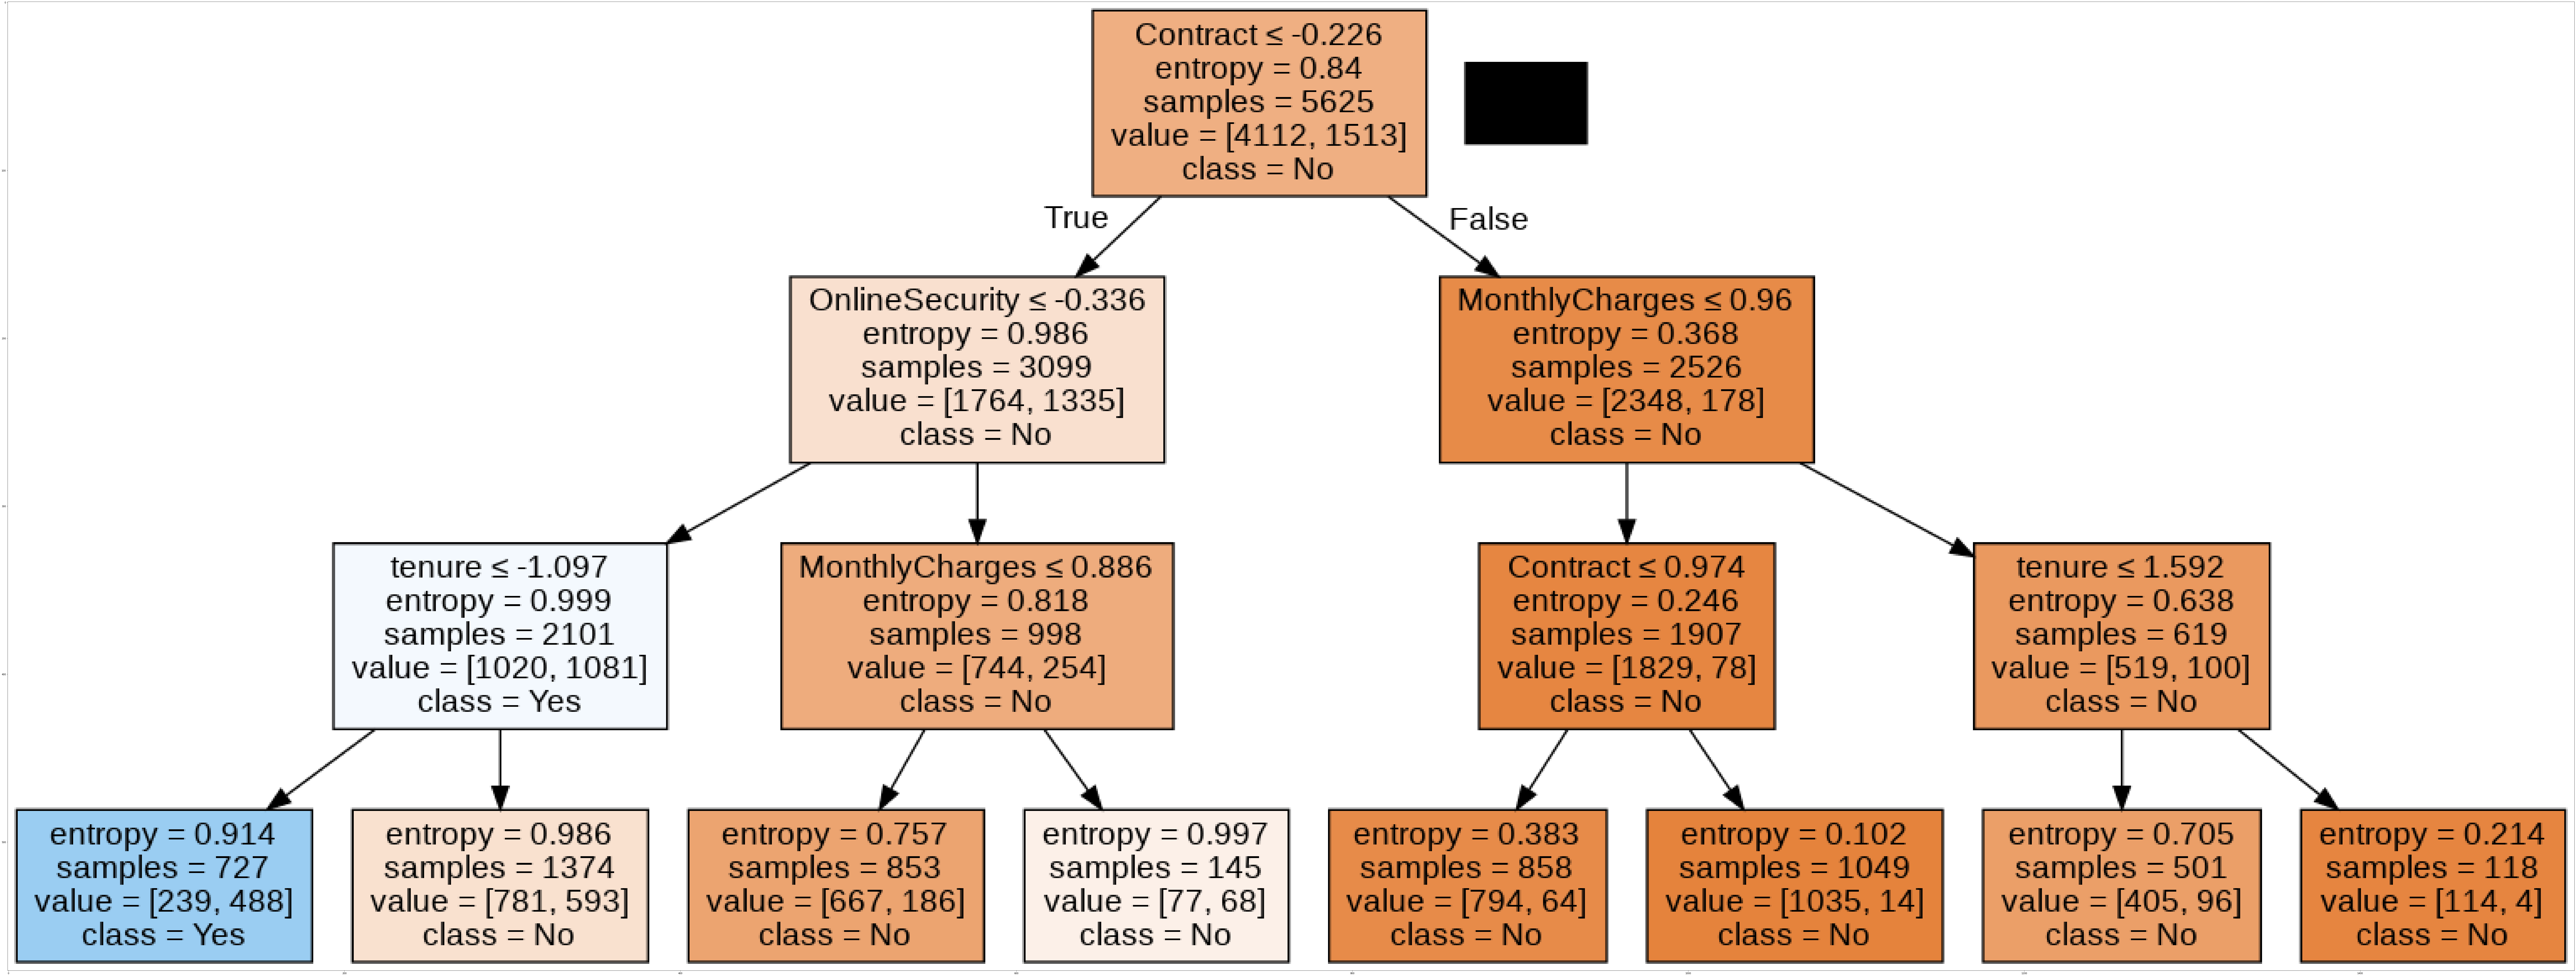

In [ ]:
dot_data = StringIO()
filename = 'churn_tree.png'
featureNames = df.columns[0:19]
targetNames = df['Churn'].unique().tolist()
out = tree.export_graphviz(model_dtree, feature_names=featureNames, out_file=dot_data,
class_names= np.unique(y_train), filled=True, 
special_characters=True, rotate=False) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(200, 100))
plt.imshow(img,interpolation='nearest')
